In [1]:

# python classics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as colors

# astronomy stuff
import astropy
from astropy import wcs
from astropy.io import fits
import sunpy
import sunpy.visualization.colormaps as cm

#scipy
from scipy import ndimage as ndi

# scikit image
from skimage import img_as_float
from skimage.morphology import reconstruction

# OS stuff
import os 

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Invalid parameter values: MJD-OBS and DATE-OBS are inconsistent.
Set MJD-END to 58249.670937 from DATE-END'. [astropy.wcs.wcs]


Text(0.5, 1.0, 'NuSTAR 002 FPMA of SNR RCW86 $\\sim$75ks Exposure')

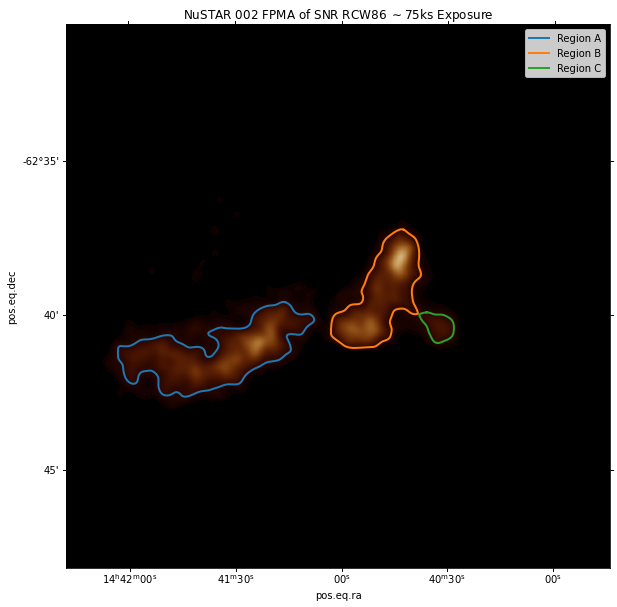

In [255]:
# Lets look at 002A 3-20 keV
data_directory_002 = '/home/padialjr/Desktop/rcw86/data/40301005002/clean_data'
os.chdir(data_directory_002)
image_fits = fits.open('imA3to20keV.fits')

# grab image data
snr_data = image_fits[0].data

# grab wcs header
w = wcs.WCS(image_fits[0])
w.to_header()

# make a copy and conver image to float

snr = np.copy(snr_data)

im = img_as_float(snr.data)

im = ndi.gaussian_filter(im,4)

seed = np.copy(im) 

seed[1:-1, 1:-1] = im.min()

mask = im 

dilated = reconstruction(seed,mask, method= 'dilation')

new_image = (im - dilated)*10**9

from skimage import measure

contours = measure.find_contours(new_image,0.79)
contours2 = measure.find_contours(new_image, .65)

sdoaia_cmap = plt.get_cmap('sdoaia193')

fig = plt.figure(figsize = (30,10))

ax = fig.add_subplot(121, projection = w)
# plt.imshow(im, norm = LogNorm())
ax.imshow(new_image, cmap = sdoaia_cmap, norm = colors.PowerNorm(gamma = 3, vmin = .45, vmax = 1.6))
# ax.hlines(y = 245, xmin = 350, xmax = 640)
plt.xlim(285,715)
plt.ylim(285,715)
label_dict = ['Region A', 'Region B', 'Region C']
i = 0
for contour in contours[:3]:
    ax.plot(contour[:,1], contour[:,0], linewidth =2, label = label_dict[i])
    ax.legend(loc = 'best')
    i = i +1
# for contour in contours2[:1]:
#     ax.plot(contour[:,1], contour[:,0], linewidth =2, c = 'w')
#     ax.legend(loc = 'best')
plt.title("NuSTAR 002 FPMA of SNR RCW86 $\sim$75ks Exposure")








the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Invalid parameter values: MJD-OBS and DATE-OBS are inconsistent.
Set MJD-END to 58289.403576 from DATE-END'. [astropy.wcs.wcs]


1.7965600918178544


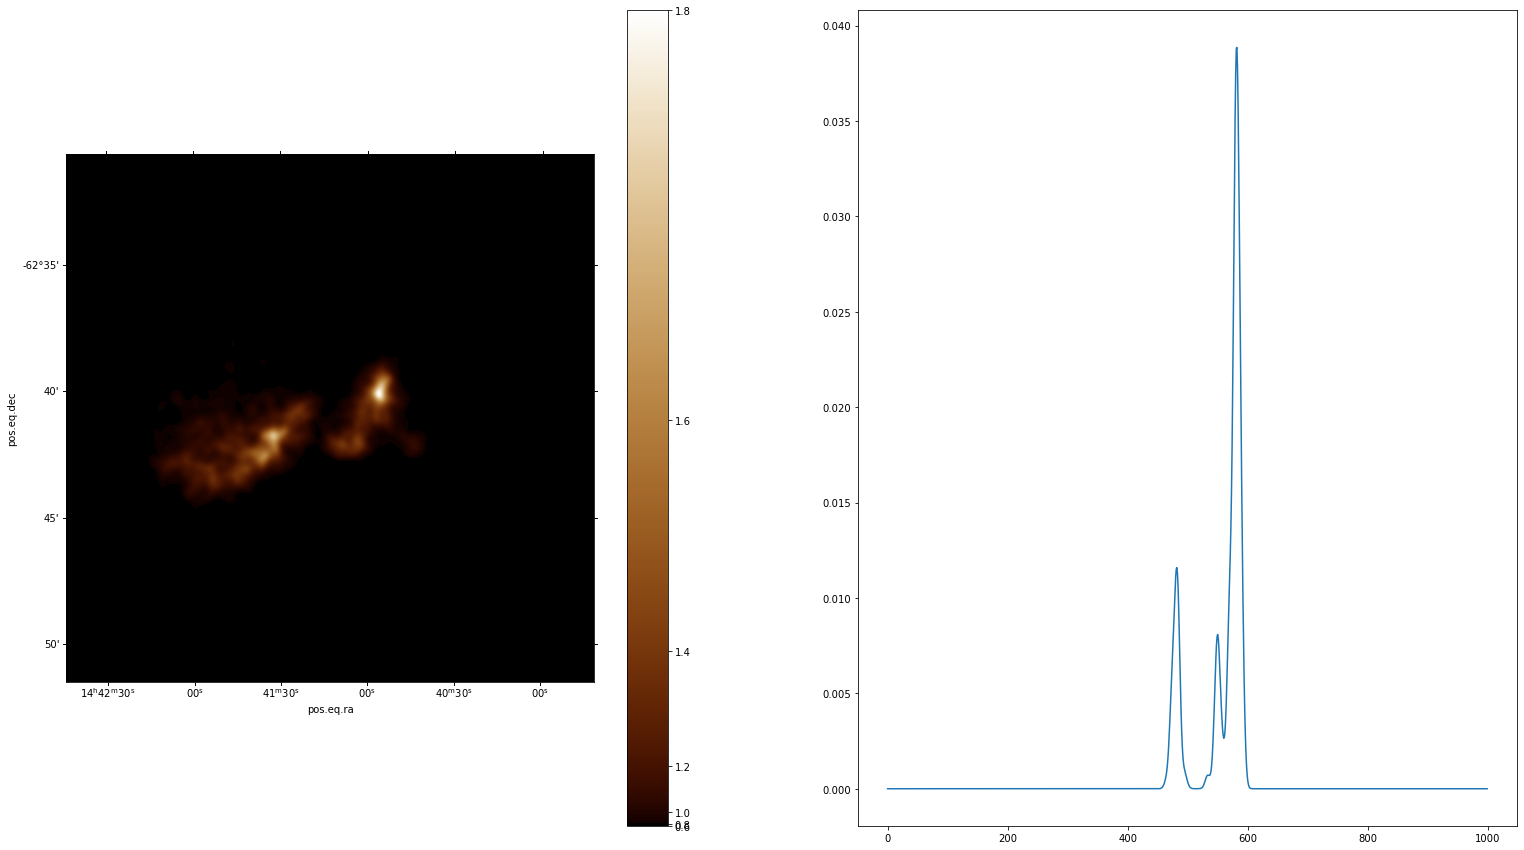

In [184]:
# lets try adding the arrays
data_directory_002 = '/home/padialjr/Desktop/rcw86/data/40301005002/clean_data'
os.chdir(data_directory_002)
fits_002A = fits.open('imA3to20keV.fits')
data_directory_004 = '/home/padialjr/Desktop/rcw86/data/40301005004/clean_data'
os.chdir(data_directory_004)
fits_004A = fits.open('imA3to20keV.fits')

both_data = fits_004A[0].data + fits_002A[0].data

# grab wcs header
w = wcs.WCS(image_fits[0])
w.to_header()

# make a copy and conver image to float

snr = np.copy(both_data)

im = img_as_float(snr.data)

im = ndi.gaussian_filter(im,4)

seed = np.copy(im) 

seed[1:-1, 1:-1] = im.min()

mask = im 

dilated = reconstruction(seed,mask, method= 'dilation')

new_image = (im - dilated)*10**9

print(np.max(new_image))

sdoaia_cmap = plt.get_cmap('sdoaia193')

fig = plt.figure(figsize = (26,15))

ax1 = fig.add_subplot(121, projection = w)
# plt.imshow(im, norm = LogNorm())
plt.imshow(new_image, cmap = sdoaia_cmap, norm = colors.PowerNorm(gamma = 4, vmin = .55, vmax = 1.8))
# ax.hlines(y = 245, xmin = 350, xmax = 640)
plt.xlim(245,755)
plt.ylim(245,755)


plt.colorbar()


ax2 = fig.add_subplot(122)
ax2.plot(new_image[255])

In [4]:
fits = fits.open('imA3to20keV.fits')

In [5]:
image_fits.info()

Filename: imA3to20keV.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     495   (1000, 1000)   int32   
  1  GTI           1 BinTableHDU     52   805R x 2C   [1D, 1D]   


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Invalid parameter values: MJD-OBS and DATE-OBS are inconsistent.
Set MJD-END to 58249.670937 from DATE-END'. [astropy.wcs.wcs]


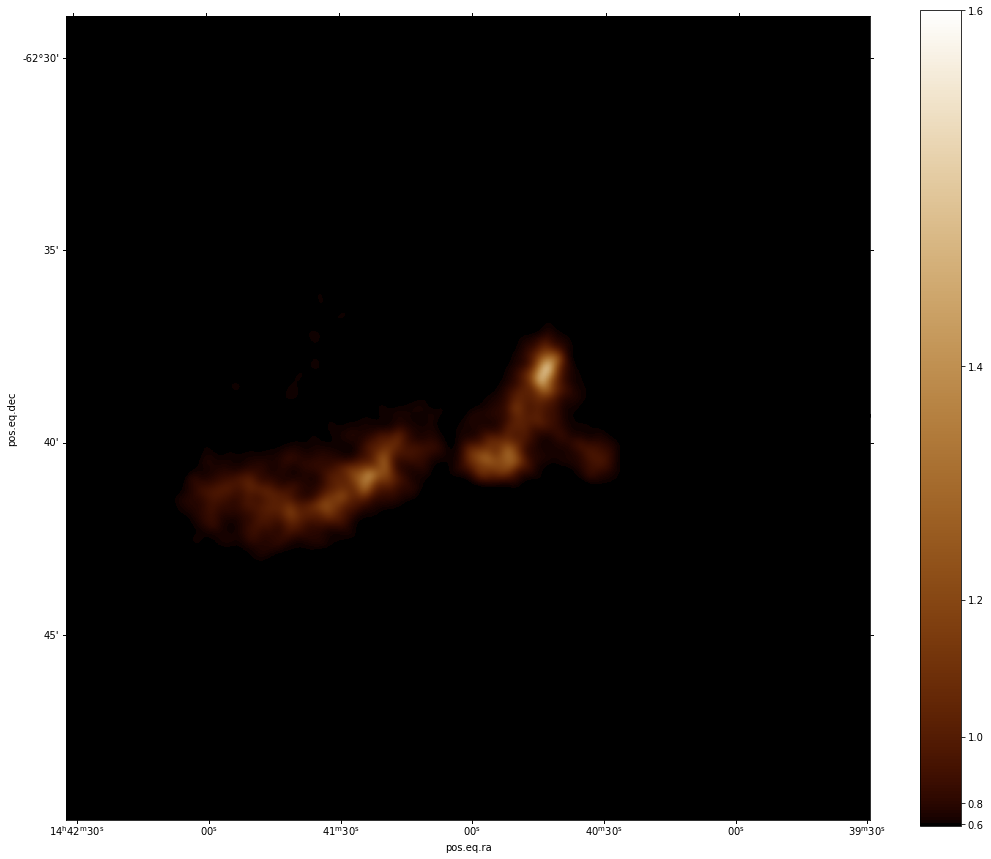

In [66]:
import astropy
import numpy as np

from astropy import wcs

data = image_fits[0].data

data_df = pd.DataFrame(data)




# fig = plt.figure(figsize = (10,10))
# plt.imshow(data)

In [7]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 220.2548  -62.6569  
CRPIX : 500.5  500.5  
NAXIS : 1000  1000

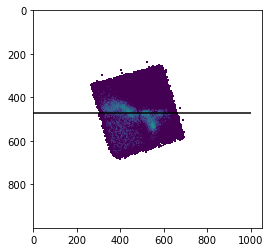

In [8]:
from matplotlib.colors import LogNorm

plt.imshow(image_fits[0].data, norm = LogNorm())
plt.hlines(xmin = 0, xmax = 1000, y = 470)

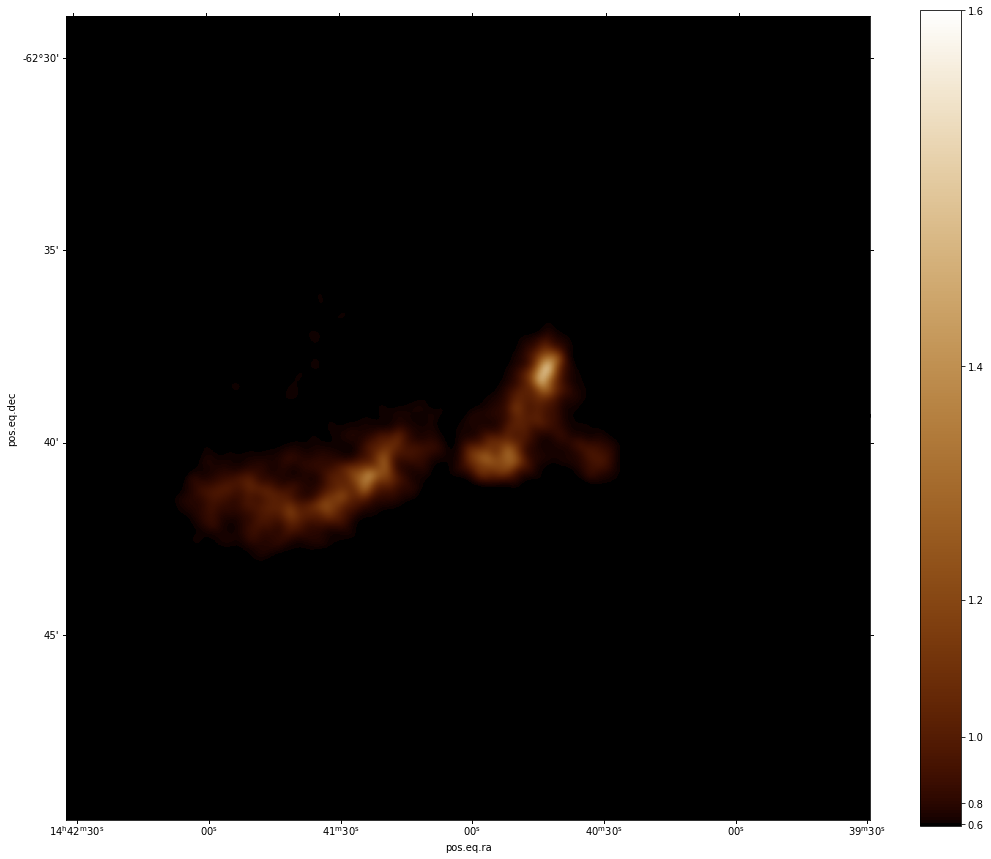

In [65]:
snr = image_fits[0].data
from scipy import ndimage as ndi
import sunpy
import sunpy.visualization.colormaps as cm
import matplotlib.colors as colors
from skimage import img_as_float
from skimage.morphology import reconstruction

im = img_as_float(snr.data)

im = ndi.gaussian_filter(im,4)

seed = np.copy(im) 

seed[1:-1, 1:-1] = im.min()

mask = im 

dilated = reconstruction(seed,mask, method= 'dilation')

new_image = (im - dilated)*10**9

sdoaia_cmap = plt.get_cmap('sdoaia193')

fig = plt.figure(figsize = (18,15))

ax = fig.add_subplot(111, projection = w)
# plt.imshow(im, norm = LogNorm())
plt.imshow(new_image, cmap = sdoaia_cmap, norm = colors.PowerNorm(gamma = 3, vmin = .45, vmax = 1.6))
plt.xlim(245,755)
plt.ylim(245,755)
plt.colorbar()
# cbar = ax.figure.colorbar(new_image)

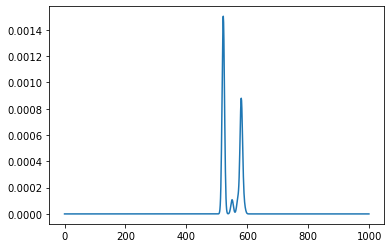

In [49]:
from scipy import ndimage
from skimage import exposure

new_image2 = np.copy(snr.data)

new_image2 = img_as_float(new_image2.data)



data2 = ndimage.gaussian_filter(new_image2.data, 6)*10**10

plt.plot(new_image[245])

bright_mask = new_image2.data < new_image2.max()*10

# data2 = ndimage.gaussian_filter(new_image2.data*~bright_mask, 9)
# labels,n = ndimage.label(new_image2.data)
# new_image2[new_image2 < 1.1] = 0
# # new_image_adaptive_eq = exposure.equalize_adapthist(new_image2, clip_limit = 0.3)
# sdoaia_cmap = plt.get_cmap('sdoaia193')

# fig = plt.figure(figsize = (10,10))

# ax = fig.add_subplot(111, projection = w)
# # plt.imshow(im, norm = LogNorm())
# ax.imshow(new_image, cmap = sdoaia_cmap, norm = colors.PowerNorm(gamma = 3, vmin = .45, vmax = 1.7))
# plt.xlim(245,755)
# plt.ylim(245,755)
# plt.contour(labels)

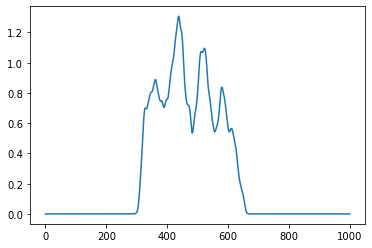

In [17]:
# data = image_fits[0].data


# from skimage.util import invert


# im = (data)

# x = im[470]

# mask = x[x==0]

# new_x = x*mask

plt.plot(new_image[465])

# for value in data:
#     print(value)
# #     if value == 0:
# #         value == 1e-9

# from skimage.morphology import convex_hull_image

# plt.imshow(im)

# chull = convex_hull_image(im)

# df = pd.DataFrame(data)

# plt.imshow(chull)

In [12]:
from scipy import ndimage as ndi

from skimage import feature

im = fits[0].data
edges2 = feature.canny(im)

plt.imshow(edges2)

TypeError: 'module' object is not subscriptable

In [ ]:
from astropy.table import Table

evt_data = Table(fits[1].data)

evt_data[:5]

In [ ]:
plt.scatter(evt_data['X'], evt_data['Y'])

In [13]:
from matplotlib.colors import LogNorm

NBINS = (100,100)
img_zero_mpl = plt.hist2d(evt_data['X'], evt_data['Y'], NBINS, cmap='viridis', vmin = .1, vmax = 40)

cbar = plt.colorbar(ticks=[1.0,3.0,6.0])
cbar.ax.set_yticklabels(['1','3','6'])

plt.xlabel('x')
plt.ylabel('y')

NameError: name 'evt_data' is not defined